***Imports and function definitions:***

---

In [29]:
from rich.jupyter import print
from rich.markdown import Markdown

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import os
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

def get_files(dir_path):
    file_list = os.listdir(dir_path)
    all_files = list()
    # Iterate over all the entries
    for entry in file_list:
        # Create full path
        full_path = os.path.join(dir_path, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(full_path):
            all_files = all_files + get_files(full_path)
        else:
            all_files.append(full_path)
                
    return all_files

def plot_graph(df, title, index, include_ylim, ylim, xlim):
    if include_ylim:
        df.plot(ax=axes[index], title=title, grid=True, ylim=ylim, xlim=xlim)
    else:
        df.plot(ax=axes[index], title=title, grid=True, xlim=xlim)
    axes[index].axhline(df.mean(), color='red', xmin=0, xmax=len(df.index))
    axes[index].margins(x=0)
    
def plot_cdf(df, label, index):
    axes[index].hist(df, cumulative=True, label=label, histtype="step", color="b", bins=len(df.index))
    axes[index].margins(x=0)

---

# PATS Data Processing - Base Case

Since there are a lot of tests, I thought I'd break them down into their individual notebooks. This notebook will look at the results of the first test set: **Base Case**.

There are 2 variations: unicast and multicast.

For each variation there are 3 runs. In every test, the first publisher records the latency and all subscribers record their throughputs.

Let's start off by looking at the unicast tests:

## Unicast

We start off by gathering all of the files related to this category:

In [30]:
bcu_files = get_files(os.path.join("Test Results", "1 - BC Unicast Rerun"))

bcu_files = [file for file in bcu_files if "clean_" in file]

In [45]:
# Get Run 1 Data
bcu_run1_files = [file for file in bcu_files if "run_1" in file]
bcu_run1_latency_file = [file for file in bcu_run1_files if "vm1_output" in file and "pub" in file][0]
bcu_run1_df = pd.read_csv(bcu_run1_latency_file)["Latency"]

# Get Run 2 Data
bcu_run2_files = [file for file in bcu_files if "run_2" in file]
bcu_run2_latency_file = [file for file in bcu_run2_files if "vm1_output" in file and "pub" in file][0]
bcu_run2_df = pd.read_csv(bcu_run2_latency_file)["Latency"]

# Get Run 3 Data
bcu_run3_files = [file for file in bcu_files if "run_3" in file]
bcu_run3_latency_file = [file for file in bcu_run3_files if "vm1_output" in file and "pub" in file][0]
bcu_run3_df = pd.read_csv(bcu_run3_latency_file)["Latency"]

My attempt at creating a grid of the 3 latency runs:

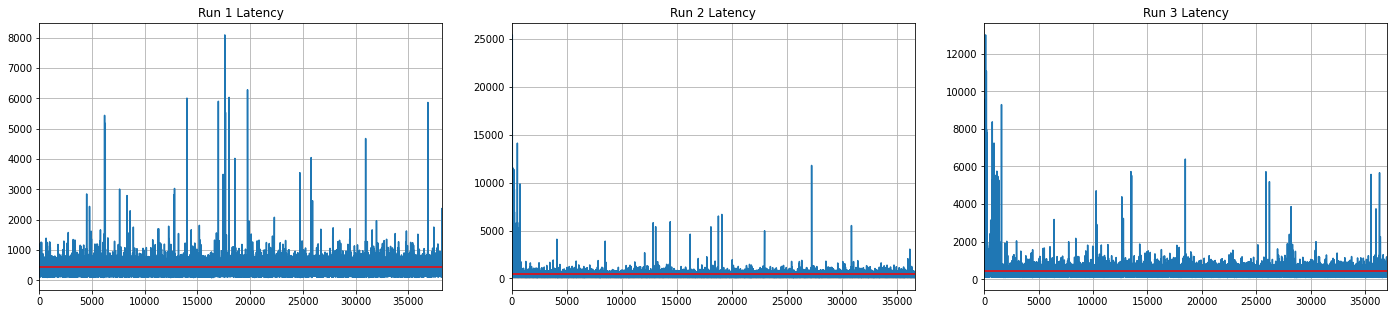

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=3)
    
ylim = (0, 2000)
    
plot_graph(bcu_run1_df, "Run 1 Latency", 0, False, ylim, (0, len(bcu_run1_df.index)))
plot_graph(bcu_run2_df, "Run 2 Latency", 1, False, ylim, (0, len(bcu_run2_df.index)))
plot_graph(bcu_run3_df, "Run 3 Latency", 2, False, ylim, (0, len(bcu_run3_df.index)))

fig.set_figheight(5)
fig.set_figwidth(20)
fig.tight_layout(pad=3)

In [48]:
bcu_run_1_summary_data = {
    'run': ['Run 1', 'Run 2', 'Run 3'],
    'max_latencies': [bcu_run1_df.max(), bcu_run2_df.max(), bcu_run3_df.max()],
    'min_latencies': [bcu_run1_df.min(), bcu_run2_df.min(), bcu_run3_df.min()],
    'avg_latencies': [bcu_run1_df.mean(), bcu_run2_df.mean(), bcu_run3_df.mean()]
}

print(pd.DataFrame(bcu_run_1_summary_data))

run  max_latencies  min_latencies  avg_latencies
0  Run 1         8092.0           88.0     423.799880
1  Run 2        25430.0           85.0     435.005839
2  Run 3        13000.0           85.0     431.558039

Wow, the maximum latency for `Run 2` is 25 seconds?!?!

Since the average latencies are around the 400ms mark let's look at the results between 0 and 2000ms:


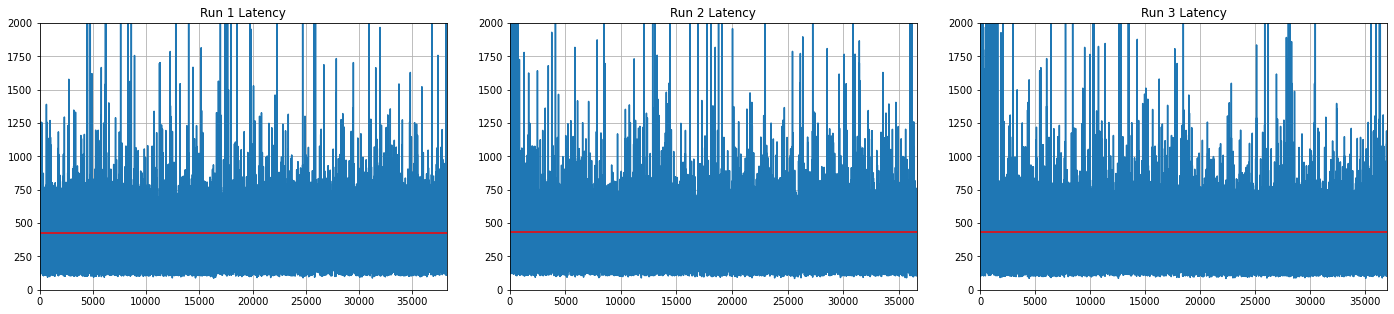

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=3)
    
ylim = (0, 2000)
    
plot_graph(bcu_run1_df, "Run 1 Latency", 0, True, ylim, (0, len(bcu_run1_df.index)))
plot_graph(bcu_run2_df, "Run 2 Latency", 1, True, ylim, (0, len(bcu_run2_df.index)))
plot_graph(bcu_run3_df, "Run 3 Latency", 2, True, ylim, (0, len(bcu_run3_df.index)))

fig.set_figheight(5)
fig.set_figwidth(20)
fig.tight_layout(pad=3)

All of the graphs look similar. Except in Run 2 and Run 3, the start of the test has higher latencies than usual.

Let's compare the CDFs of the 3 runs:

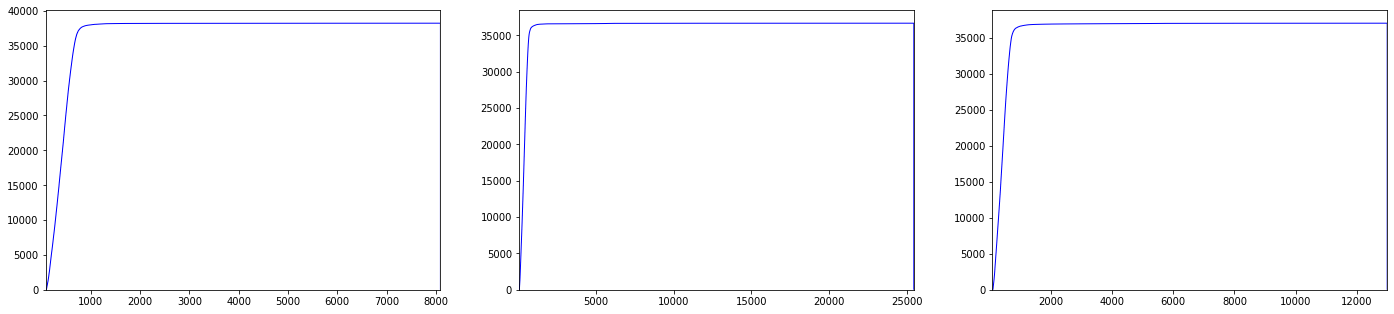

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=3)

plot_cdf(bcu_run1_df, "Run 1 CDF", 0)
plot_cdf(bcu_run2_df, "Run 2 CDF", 1)
plot_cdf(bcu_run3_df, "Run 3 CDF", 2)

fig.set_figheight(5)
fig.set_figwidth(20)
fig.tight_layout(pad=3)

## Multicast

In [51]:
bcm_files = get_files(os.path.join("Test Results", "1 - BC Multicast"))

bcm_files = [file for file in bcm_files if "clean_" in file]

# Get Run 1 Data
bcm_run1_files = [file for file in bcm_files if "run_1" in file]
bcm_run1_latency_file = [file for file in bcm_run1_files if "vm1_output" in file and "pub" in file][0]
bcm_run1_df = pd.read_csv(bcm_run1_latency_file)["Latency"]

# Get Run 3 Data
bcm_run2_files = [file for file in bcm_files if "run_2" in file]
bcm_run2_latency_file = [file for file in bcm_run2_files if "vm1_output" in file and "pub" in file][0]
bcm_run2_df = pd.read_csv(bcm_run2_latency_file)["Latency"]

# Get Run 3 Data
bcm_run3_files = [file for file in bcm_files if "run_3" in file]
bcm_run3_latency_file = [file for file in bcm_run3_files if "vm1_output" in file and "pub" in file][0]
bcm_run3_df = pd.read_csv(bcm_run3_latency_file)["Latency"]

Comparing the 3 latency runs:

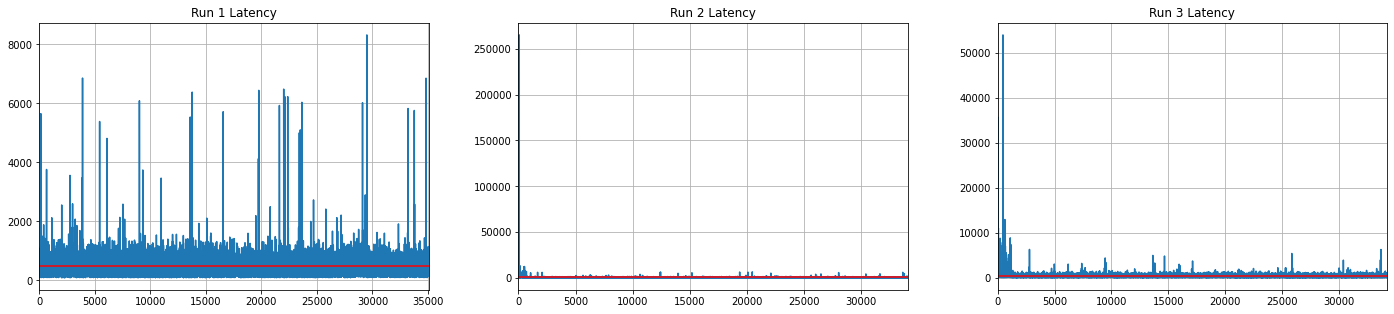

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=3)
ylim = (0, 2000)
plot_graph(bcm_run1_df, "Run 1 Latency", 0, False, ylim, (0, len(bcm_run1_df.index)))
plot_graph(bcm_run2_df, "Run 2 Latency", 1, False, ylim, (0, len(bcm_run2_df.index)))
plot_graph(bcm_run3_df, "Run 3 Latency", 2, False, ylim, (0, len(bcm_run3_df.index)))

fig.set_figheight(5)
fig.set_figwidth(20)
fig.tight_layout(pad=3)

The summary data:

In [53]:
bcm_run_1_summary_data = {
    'run': ['Run 1', 'Run 2', 'Run 3'],
    'max_latencies': [bcm_run1_df.max(), bcm_run2_df.max(), bcm_run3_df.max()],
    'min_latencies': [bcm_run1_df.min(), bcm_run2_df.min(), bcm_run3_df.min()],
    'avg_latencies': [bcm_run1_df.mean(), bcm_run2_df.mean(), bcm_run3_df.mean()]
}

print(pd.DataFrame(bcm_run_1_summary_data))

run  max_latencies  min_latencies  avg_latencies
0  Run 1         8318.0           96.0     506.446291
1  Run 2       265183.0           94.0     528.019409
2  Run 3        54000.0           93.0     509.520710

Zooming into the packets between 0 and 1000ms:

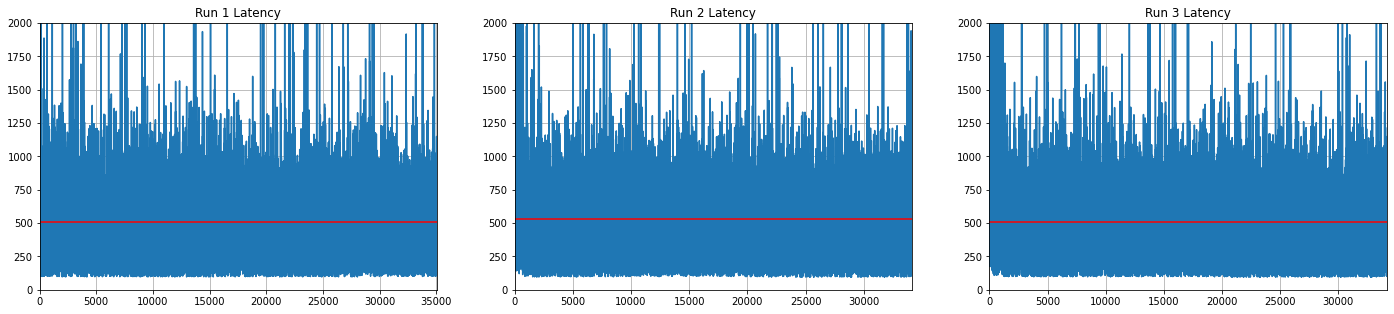

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=3)
ylim = (0, 2000)
plot_graph(bcm_run1_df, "Run 1 Latency", 0, True, ylim, (0, len(bcm_run1_df.index)))
plot_graph(bcm_run2_df, "Run 2 Latency", 1, True, ylim, (0, len(bcm_run2_df.index)))
plot_graph(bcm_run3_df, "Run 3 Latency", 2, True, ylim, (0, len(bcm_run3_df.index)))

fig.set_figheight(5)
fig.set_figwidth(20)
fig.tight_layout(pad=3)

The graphs look similar. Let's take a look at their CDFs:

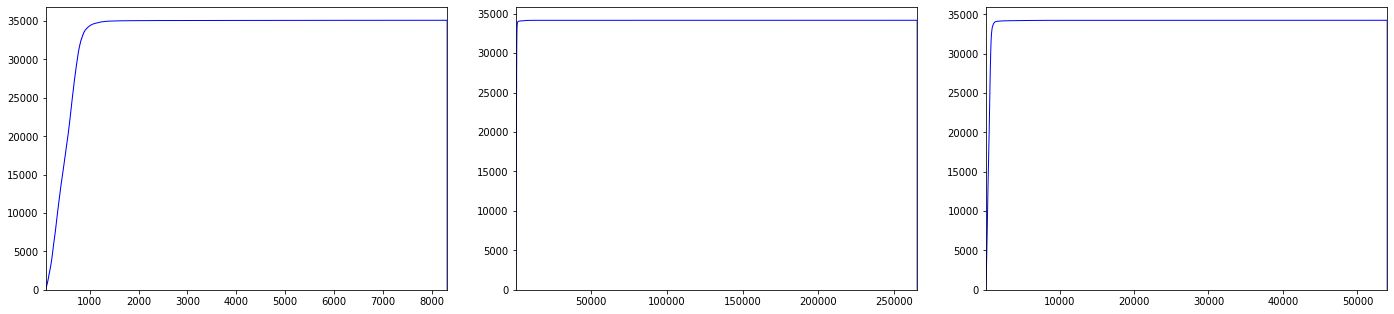

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=3)

plot_cdf(bcm_run1_df, "Run 1 CDF", 0)
plot_cdf(bcm_run2_df, "Run 2 CDF", 1)
plot_cdf(bcm_run3_df, "Run 3 CDF", 2)

fig.set_figheight(5)
fig.set_figwidth(20)
fig.tight_layout(pad=3)

What is going on with the CDF of Run 2. Let's zoom in onto it:

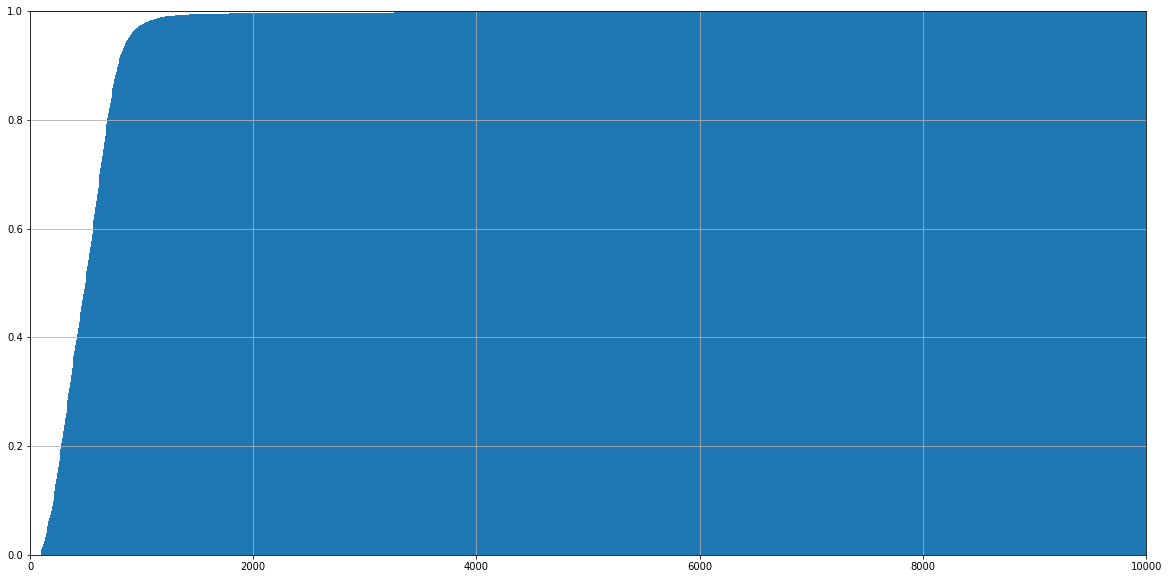

In [74]:
ax = bcm_run2_df.hist(cumulative = True, density = 1, bins = len(bcm_run2_df.index), figsize=(20, 10))
ax.margins(0)
ax.set_xlim([0, 10000])
plt.show()

Let's take a look at a summary of the latency from Run 2:

In [70]:
bcm_run2_df.describe()

count     34159.000000
mean        528.019409
std        1498.649628
min          94.000000
25%         319.000000
50%         497.000000
75%         663.000000
max      265183.000000
Name: Latency, dtype: float64

Let's compare the unicast with multicast:

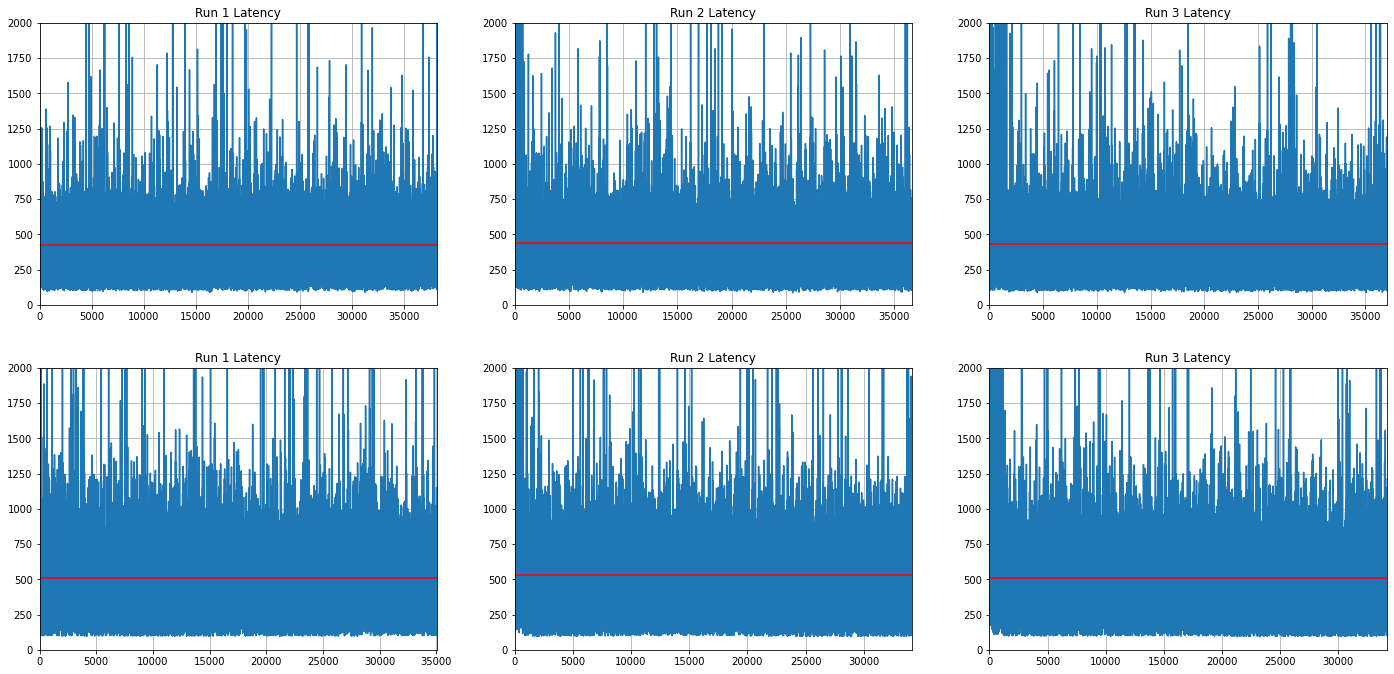

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=3)

ylim = (0, 2000)

# Unicast Row
plot_graph(bcu_run1_df, "Run 1 Latency", (0, 0), True, ylim, (0, len(bcu_run1_df.index)))
plot_graph(bcu_run2_df, "Run 2 Latency", (0, 1), True, ylim, (0, len(bcu_run2_df.index)))
plot_graph(bcu_run3_df, "Run 3 Latency", (0, 2), True, ylim, (0, len(bcu_run3_df.index)))

# Multicast Row
plot_graph(bcm_run1_df, "Run 1 Latency", (1, 0), True, ylim, (0, len(bcm_run1_df.index)))
plot_graph(bcm_run2_df, "Run 2 Latency", (1, 1), True, ylim, (0, len(bcm_run2_df.index)))
plot_graph(bcm_run3_df, "Run 3 Latency", (1, 2), True, ylim, (0, len(bcm_run3_df.index)))

fig.set_figheight(10)
fig.set_figwidth(20)
fig.tight_layout(pad=3)

Let's compare their CDFs too:

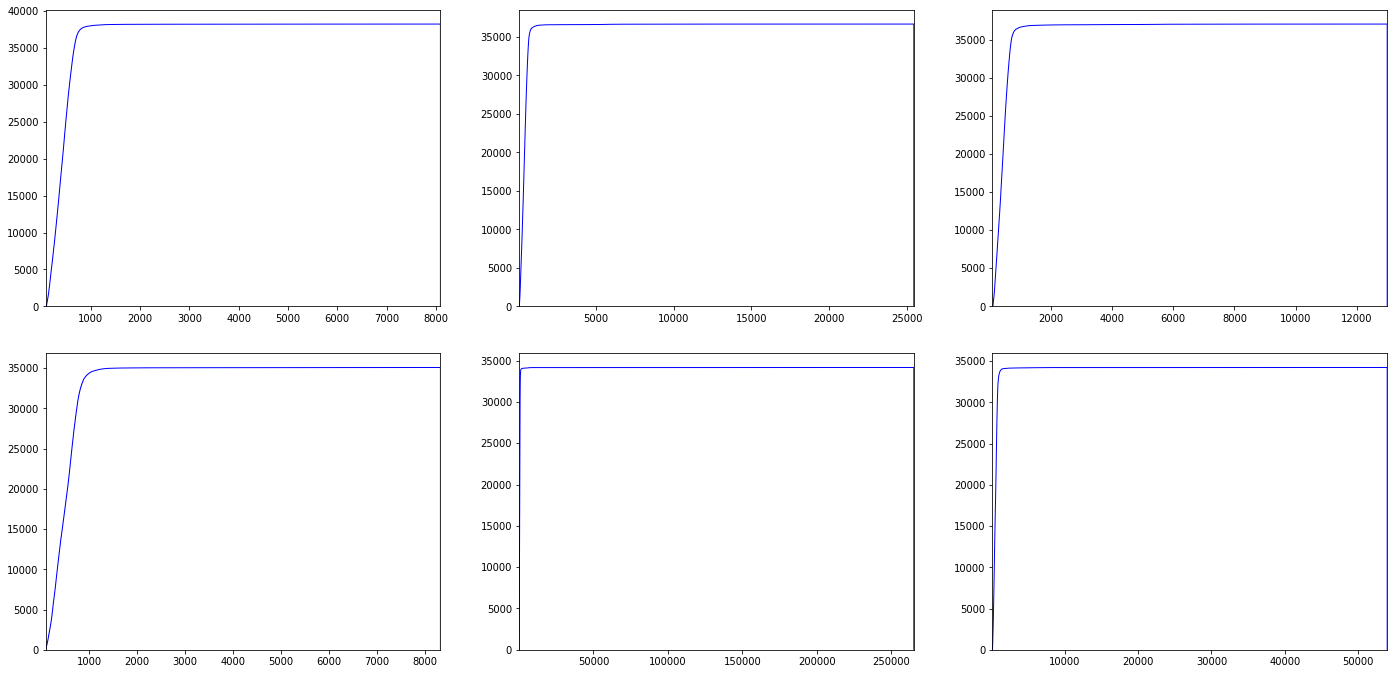

In [75]:
fig, axes = plt.subplots(nrows=2, ncols=3)

ylim = (0, 2000)

# Unicast Row
plot_cdf(bcu_run1_df, "Run 1 Latency", (0, 0))
plot_cdf(bcu_run2_df, "Run 2 Latency", (0, 1))
plot_cdf(bcu_run3_df, "Run 3 Latency", (0, 2))

# Multicast Row
plot_cdf(bcm_run1_df, "Run 1 Latency", (1, 0))
plot_cdf(bcm_run2_df, "Run 2 Latency", (1, 1))
plot_cdf(bcm_run3_df, "Run 3 Latency", (1, 2))

fig.set_figheight(10)
fig.set_figwidth(20)
fig.tight_layout(pad=3)